Q1) A)

In [158]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from dateutil.relativedelta import relativedelta, MO
from datetime import datetime, timedelta 
from dateutil.relativedelta import relativedelta
%matplotlib inline
from gekko import GEKKO

In [159]:
df = pd.read_excel("/Users/meetshah/Desktop/Final/Cublic_Spline.xlsx")

In [160]:
df

,Date,1 Mo,2 Mo,3 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
0,2020-01-02,1.53,1.55,1.54,1.57,1.56,1.58,1.59,1.67,1.79,1.88,2.19,2.33
1,2020-01-03,1.52,1.55,1.52,1.55,1.55,1.53,1.54,1.59,1.71,1.80,2.11,2.26
2,2020-01-06,1.54,1.54,1.56,1.56,1.54,1.54,1.56,1.61,1.72,1.81,2.13,2.28
3,2020-01-07,1.52,1.53,1.54,1.56,1.53,1.54,1.55,1.62,1.74,1.83,2.16,2.31
4,2020-01-08,1.50,1.53,1.54,1.56,1.55,1.58,1.61,1.67,1.78,1.87,2.21,2.35
5,2020-01-09,1.53,1.55,1.54,1.56,1.54,1.58,1.59,1.65,1.77,1.85,2.17,2.38
6,2020-01-10,1.52,1.55,1.54,1.55,1.53,1.56,1.59,1.63,1.74,1.83,2.14,2.28
7,2020-01-13,1.54,1.56,1.57,1.57,1.53,1.58,1.60,1.65,1.76,1.85,2.16,2.30
8,2020-01-14,1.53,1.56,1.57,1.57,1.53,1.58,1.59,1.63,1.74,1.82,2.12,2.27
9,2020-01-15,1.53,1.56,1.57,1.58,1.54,1.56,1.56,1.60,1.71,1.79,2.09,2.23


1


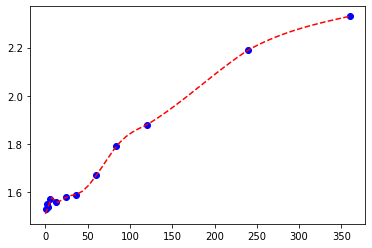

2


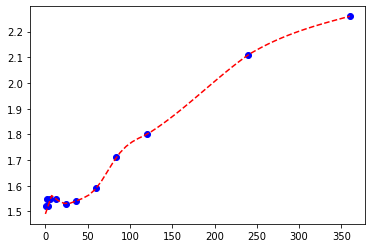

3


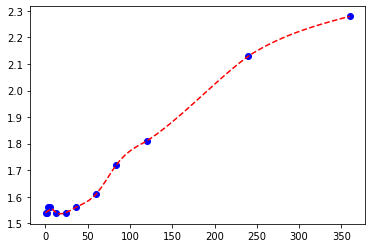

4


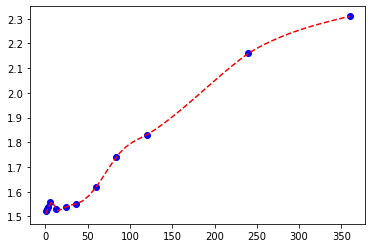

5


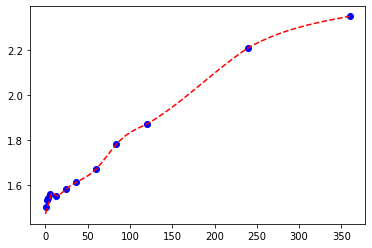

6


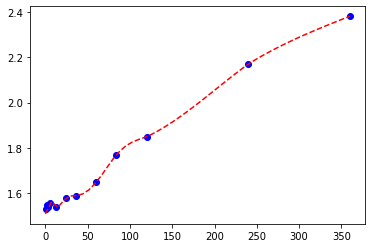

7


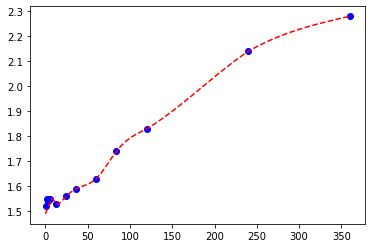

8


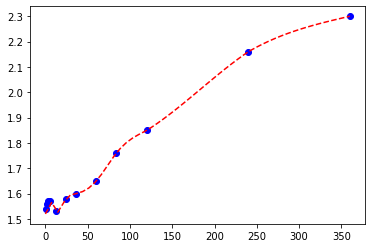

9


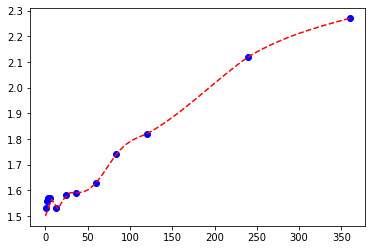

10


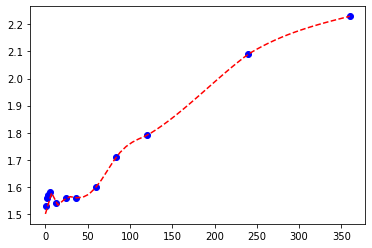

11


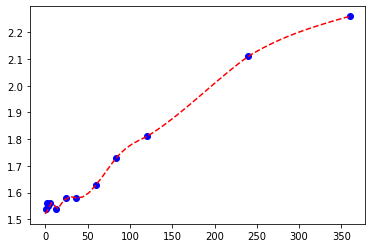

12


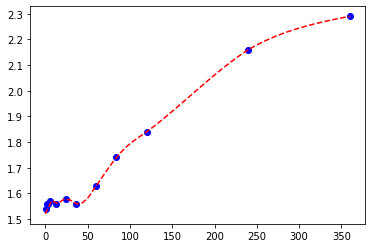

13


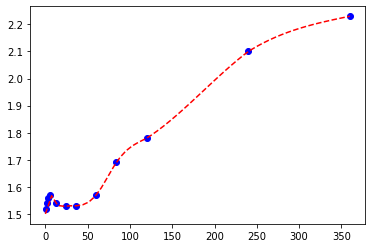

14


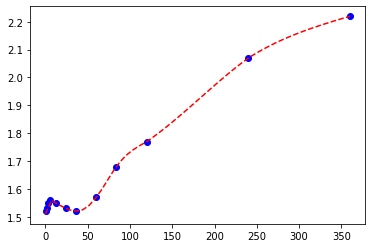

15


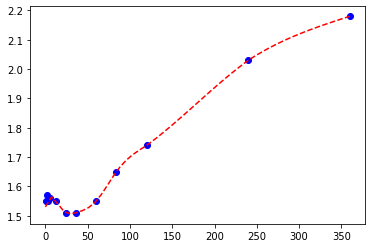

16


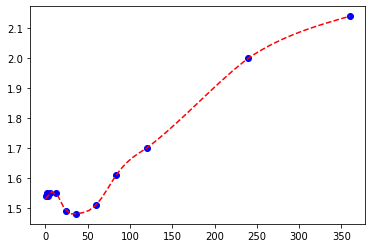

17


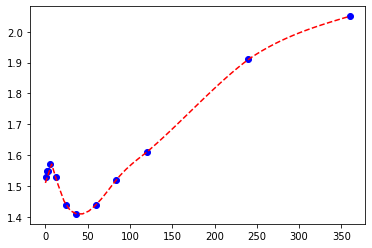

18


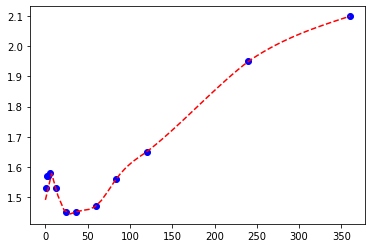

19


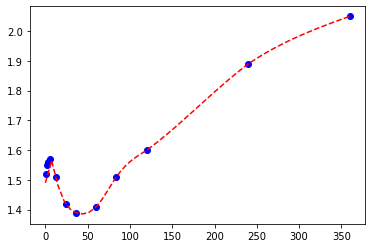

20


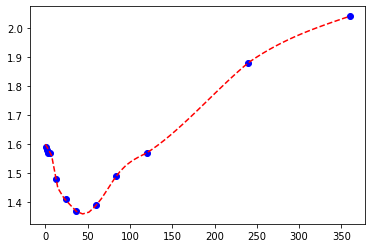

21


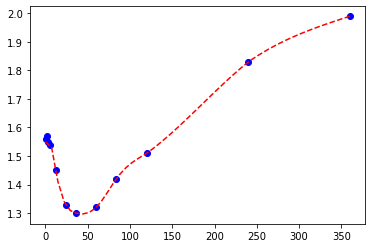

22


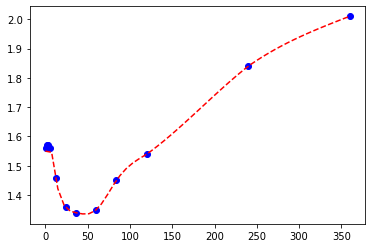

23


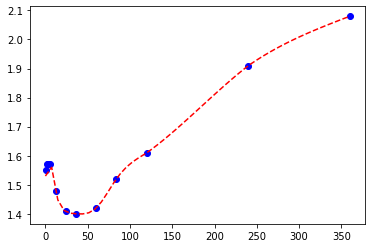

24


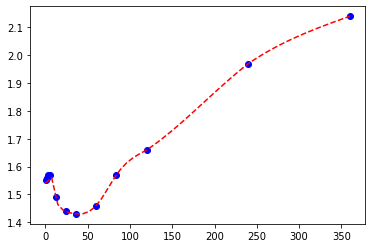

25


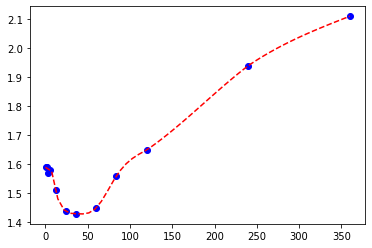

26


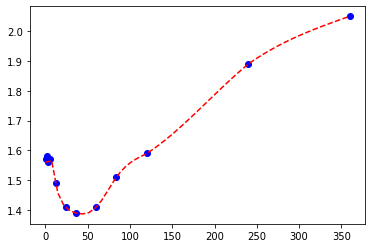

27


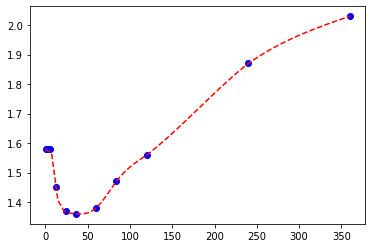

28


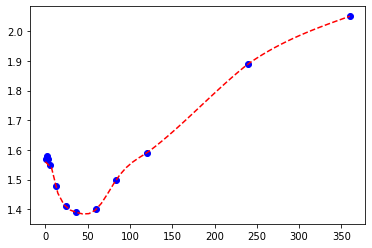

29


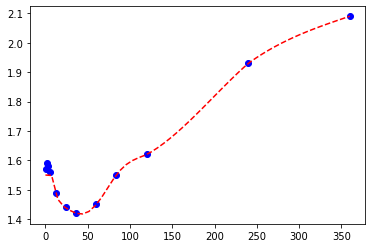

30


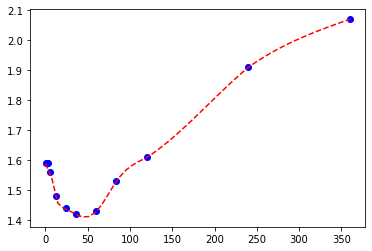

31


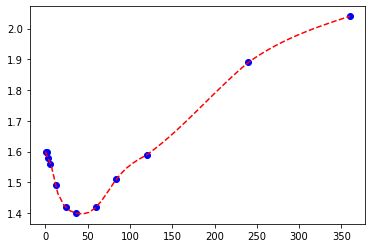

32


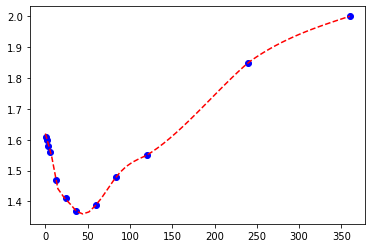

33


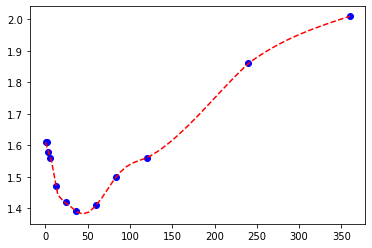

34


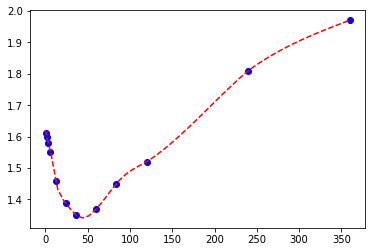

35


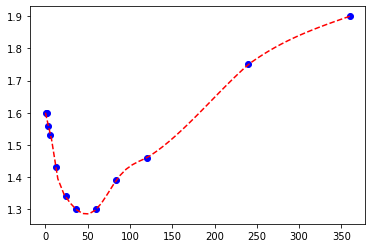

36


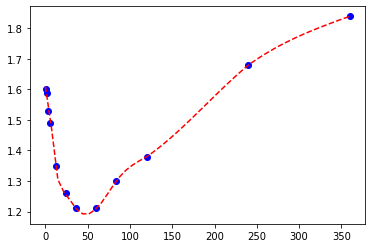

37


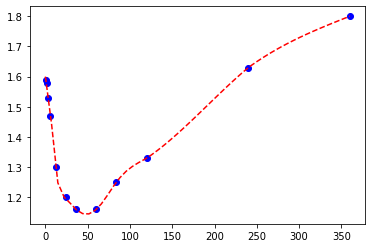

38


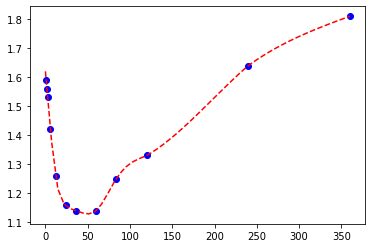

39


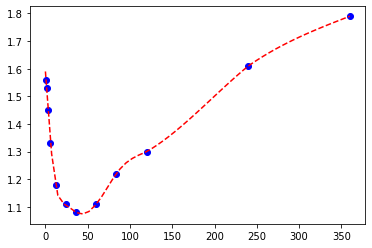

40


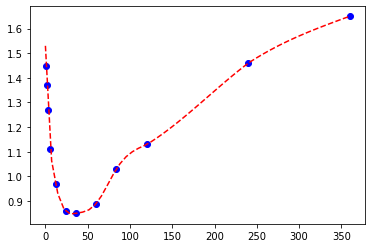

41


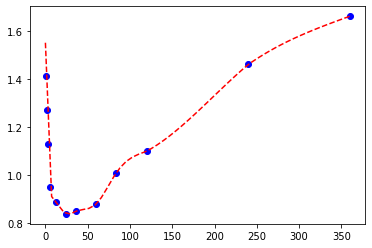

42


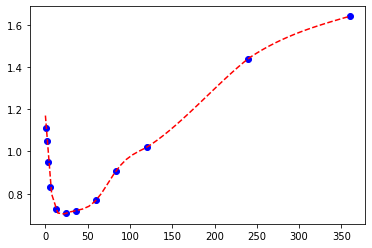

43


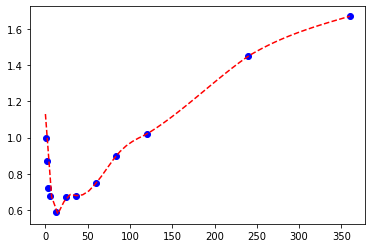

44


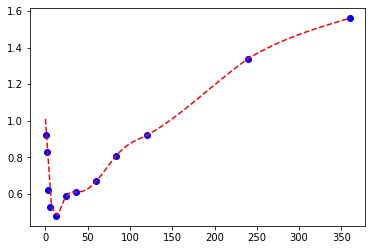

45


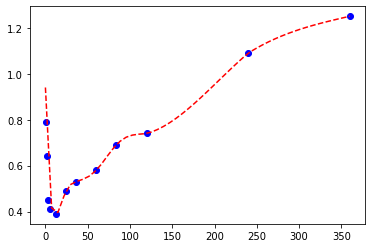

46


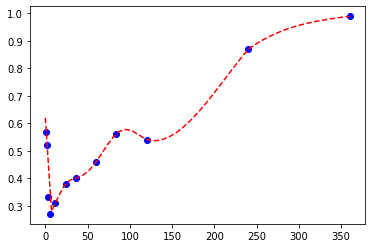

47


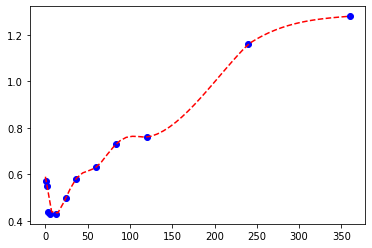

48


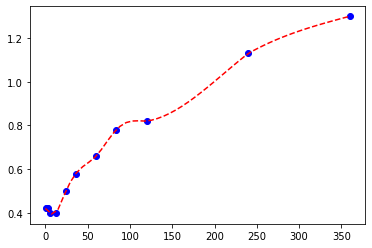

49


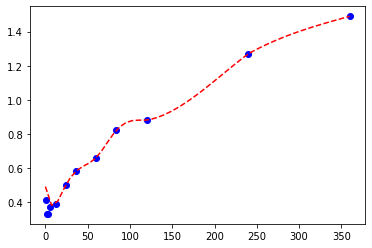

50


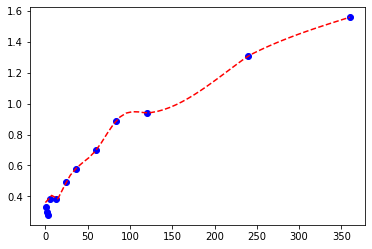

51


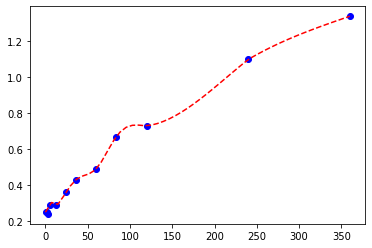

52


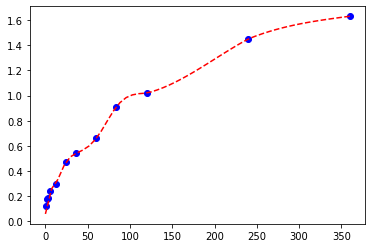

53


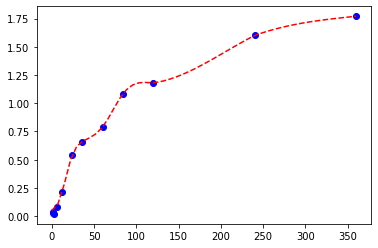

54


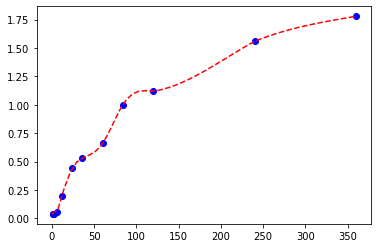

55


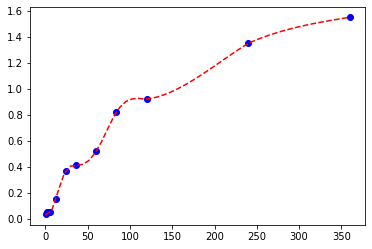

56


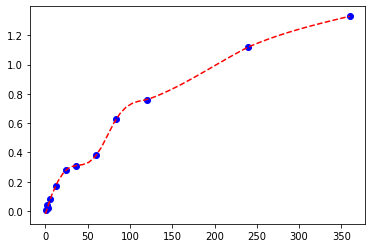

57


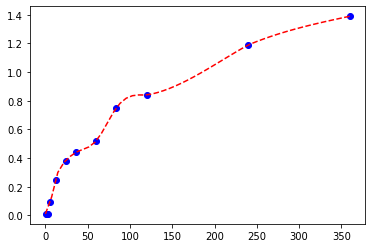

58


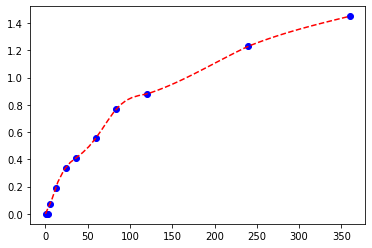

59


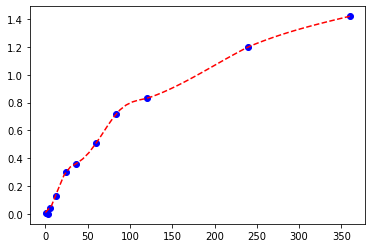

60


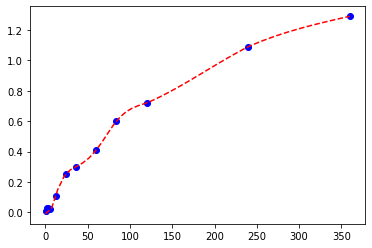

61


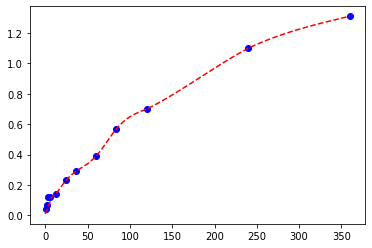

62


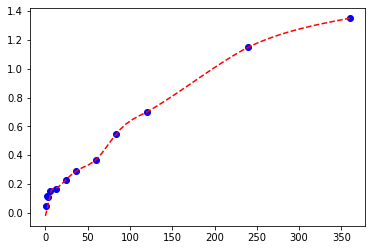

63


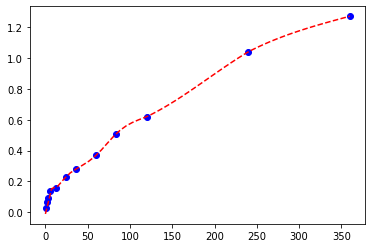

64


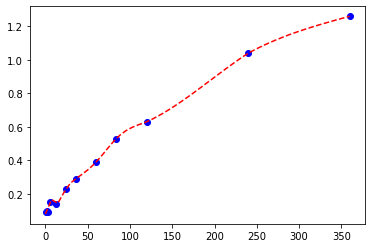

65


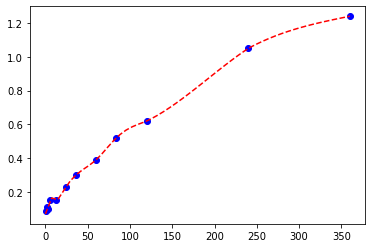

66


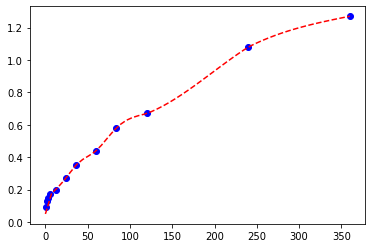

67


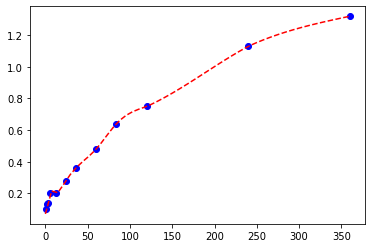

68


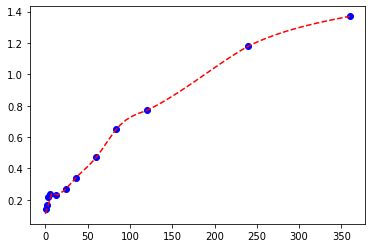

69


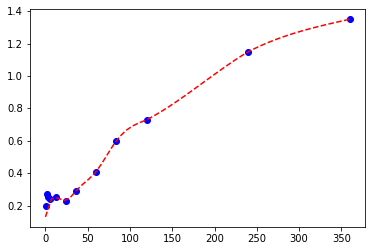

70


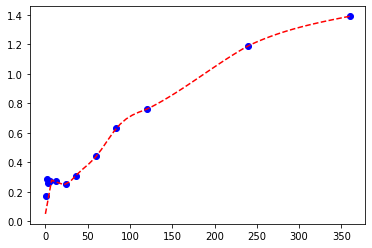

71


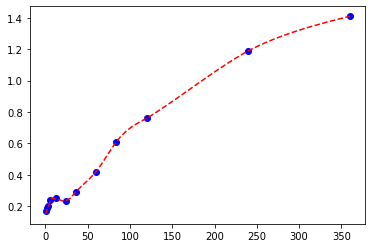

72


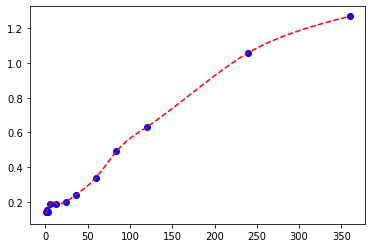

73


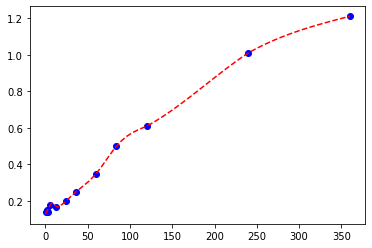

74


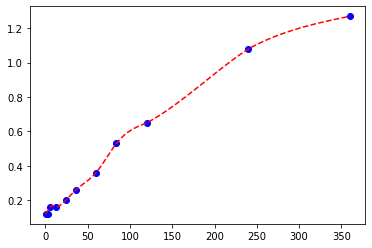

75


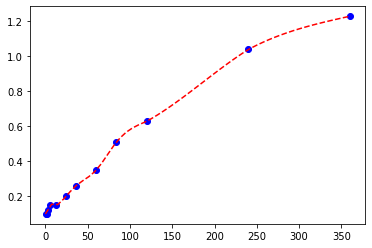

76


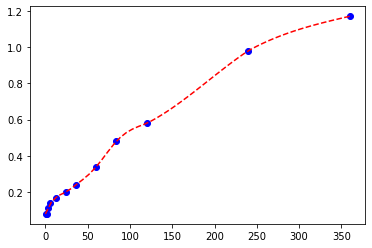

77


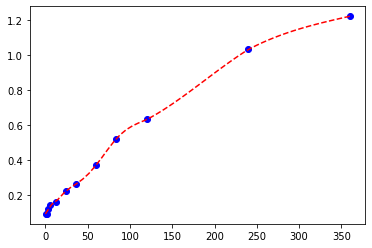

78


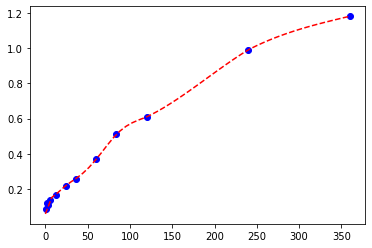

In [120]:
m= GEKKO()
xm=[1,2,3,6,12,24,36,60,84,120,240,360]
for i in range(1,79):
    ym = df.iloc[i-1:i, 1:13]
    ym = ym.values.tolist()[0]
    m= GEKKO()
    m.x = m.Param(value= np.linspace(0,360))
    m.y = m.Var()
    m.cspline(m.x,m.y,xm,ym)
    m.options.IMODE=2
    m.solve(disp=False)
    

    plt.plot(xm,ym,'bo',label='data')
    plt.plot(m.x,m.y,'r--',label='cubic spline')
    print(i)
    plt.show()

Q1) B) 

End of the Months Yield (31 Jan 2020, 28 Feb 2020, 31 March 2020 )

[1.56, 1.57, 1.55, 1.54, 1.45, 1.33, 1.3, 1.32, 1.42, 1.51, 1.83, 1.99]
21


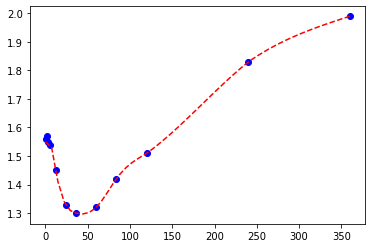

[1.45, 1.37, 1.27, 1.11, 0.97, 0.86, 0.85, 0.89, 1.03, 1.13, 1.46, 1.65]
40


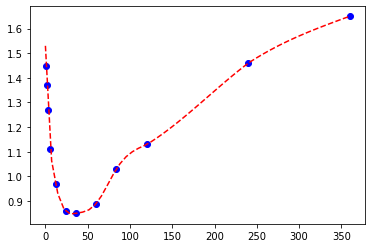

[0.05, 0.12, 0.11, 0.15, 0.17, 0.23, 0.29, 0.37, 0.55, 0.7, 1.15, 1.35]
62


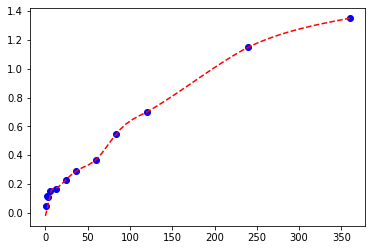

In [122]:
xm=[1,2,3,6,12,24,36,60,84,120,240,360]
row_end=[21,40,62]
for i in row_end:
    ym = df.iloc[i-1:i, 1:13]
    ym = ym.values.tolist()[0]
    m= GEKKO()
    m.x = m.Param(value= np.linspace(0,360))
    m.y = m.Var()
    m.cspline(m.x,m.y,xm,ym)
    m.options.IMODE=2
    m.solve(disp=False)
    print(ym)

    plt.plot(xm,ym,'bo',label='data')
    plt.plot(m.x,m.y,'r--',label='cubic spline')
    print(i)
    plt.show()

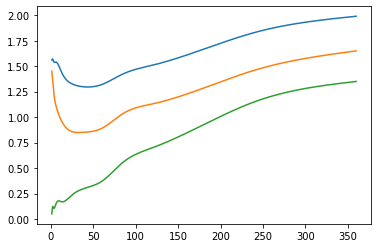

In [123]:
#Spot Rates
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt
xm=[1,2,3,6,12,24,36,60,84,120,240,360]
row_end=[21,40,62]
for i in row_end:
    ym = df.iloc[i-1:i, 1:13]
    ym = ym.values.tolist()[0]
    tenor= np.array(xm)
    yields= np.array(ym)
    cs= CubicSpline(tenor, yields, bc_type='natural')
    curvepoints=np.linspace(min(tenor),max(tenor),10000)
    plt.plot(curvepoints,cs(curvepoints),label="Spot Rates")
   

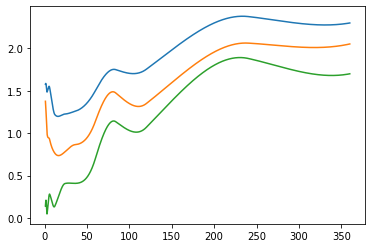

In [124]:
#Instantaneous Forward Rates
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt
xm=[1,2,3,6,12,24,36,60,84,120,240,360]
row_end=[21,40,62]
for i in row_end:
    ym = df.iloc[i-1:i, 1:13]
    ym = ym.values.tolist()[0]
    tenor= np.array(xm)
    yields= np.array(ym)
    cs= CubicSpline(tenor, yields, bc_type='natural')
    curvepoints=np.linspace(min(tenor),max(tenor),10000)

    plt.plot(curvepoints,(cs(curvepoints)+cs(curvepoints,1)*curvepoints),label="Instantaneous Forward Rates")
    

Q1) c)
Daily Yield Curve: (Analysis)
During the months of January and February, partial inversion of yield curves are nooticed towards the left end of the spectrum. That is the short term rates are higher than the long term rates. Historically speaking a inversion of a yield curve is supposed to be a strongly correlated indicator of bare markets or a recession. However, the most common indicator used by investors which influences their investing decisions or to predict recession, is the SPREAD between the 10YR treasuries and 2YR treasuries in order to check for the inversion. As we can see from the discrete data as well as the cubic spline fitted graph, the curve is NORMAL in the spread between 2YR and 10YR. So the investors would not be fearing a recession. 
By the end of March however, we notice that the yield curve is completely normal between 1month and 30YR.

Q2) a)

In [349]:
df2 = pd.read_excel("/Users/meetshah/Desktop/Final/m.xlsx")

In [350]:
df2

,Coupon,First Coupon,Maturity
0,2.250,2020-02-15,2027-02-15
1,1.750,2020-12-31,2026-12-31
2,1.500,2020-01-31,2027-01-31
3,1.125,2020-02-28,2027-02-28
4,2.375,2020-05-15,2027-05-15
5,2.250,2020-08-15,2027-08-15
6,0.625,2020-03-31,2027-03-31
7,2.250,2020-11-15,2027-11-15
8,2.750,2020-02-15,2028-02-15
9,2.875,2020-05-15,2028-05-15


In [351]:
df_date = pd.to_datetime(df['Date'], format='%d%b%Y:%H:%M:%S.%f')


In [352]:
df2 = pd.read_excel("/Users/meetshah/Desktop/Final/m.xlsx")
df2_cp = pd.to_datetime(df2['First Coupon'], format='%d%b%Y:%H:%M:%S.%f')
df2_mt = pd.to_datetime(df2['Maturity'], format='%d%b%Y:%H:%M:%S.%f')
df2_cp.head()

0   2020-02-15
1   2020-12-31
2   2020-01-31
3   2020-02-28
4   2020-05-15
Name: First Coupon, dtype: datetime64[ns]

In [353]:
df2_mt = pd.to_datetime(df2['Maturity'], format='%d%b%Y:%H:%M:%S.%f')
df2_mt[0]

Timestamp('2027-02-15 00:00:00')

In [371]:
xm=[1,2,3,6,12,24,36,60,84,120,240,360]
final_eq=[]
for q in range(78):
    df2 = pd.read_excel("/Users/meetshah/Desktop/Final/m.xlsx")
    df2_cp = pd.to_datetime(df2['First Coupon'], format='%d%b%Y:%H:%M:%S.%f')
    df2_mt = pd.to_datetime(df2['Maturity'], format='%d%b%Y:%H:%M:%S.%f')
    ym = df.iloc[q:q+1,1:13]
    ym = ym.values.tolist()[0]
    tenor= np.array(xm)
    yields= np.array(ym)
    cs= CubicSpline(tenor, yields, bc_type='natural')
    curvepoints=np.linspace(min(tenor),max(tenor),10000)
    result=[]
    ytm=[]
    rb365=[]
    eq=[]
    cp= df2_cp
    mt = df2_mt
    for i in range(17):
        temp =[]
        tempytm=[]
        temprb_arr=[]
        temp_sum=0
        tempcs =0
        while mt[i]>=cp[i]: 

            temp.append((cp[i]-df_date[q]).days)
            cs_val=((cp[i]-df_date[q]).days)/30
            tempcs = cs(cs_val)
            tempcs_1 = 1+(float(tempcs)/100)
            temprb = ((cp[i]-df_date[q]).days)/365
            tempcspower= (tempcs_1)**temprb
            re_tempcspower = tempcspower**-1
            temp_sum+=re_tempcspower
            tempytm.append(tempcs)
            temprb_arr.append(temprb)
            cp[i] = cp[i] + relativedelta(months=+6)
        temp_sum*= (df2['Coupon'][i])/2
        temp_sum += (re_tempcspower*100)
        result.append(temp)
        ytm.append(tempytm)
        eq.append(temp_sum)
        rb365.append(temprb)
    
    final_eq.append(eq)
print(final_eq)


[[103.9539533404816, 98.94518895005501, 98.73947166720296, 95.93559690224889, 104.31418206484695, 102.90428430099307, 92.24732359509683, 102.3791492873135, 108.05985486209642, 108.51262921294037, 107.96537169200069, 109.37781329852098, 107.54198357998561, 104.82892543384688, 97.7698900606956, 98.34849993325253, 97.17306986845605], [104.48781204067677, 99.46437070706713, 99.2583742480611, 96.45130253126572, 104.86301263766788, 103.46484596260433, 92.75768021490529, 102.95496335996036, 108.66370427751673, 109.1374379994253, 108.60943282254783, 110.04867184020904, 108.21993343903483, 105.51969107240342, 98.45748708668886, 99.05975364392495, 97.89520865158623], [104.43806399200517, 99.41484012535493, 99.21040808371733, 96.40492783363239, 104.81368799146136, 103.41628699186631, 92.71313916244944, 102.90575901612102, 108.61167307552167, 109.08245280479004, 108.5516717935332, 109.98635735983972, 108.15559259694741, 105.4516577356996, 98.38788850970491, 98.98475466819615, 97.81652206295364], [

In [374]:
print(final_eq)

[[103.9539533404816, 98.94518895005501, 98.73947166720296, 95.93559690224889, 104.31418206484695, 102.90428430099307, 92.24732359509683, 102.3791492873135, 108.05985486209642, 108.51262921294037, 107.96537169200069, 109.37781329852098, 107.54198357998561, 104.82892543384688, 97.7698900606956, 98.34849993325253, 97.17306986845605], [104.48781204067677, 99.46437070706713, 99.2583742480611, 96.45130253126572, 104.86301263766788, 103.46484596260433, 92.75768021490529, 102.95496335996036, 108.66370427751673, 109.1374379994253, 108.60943282254783, 110.04867184020904, 108.21993343903483, 105.51969107240342, 98.45748708668886, 99.05975364392495, 97.89520865158623], [104.43806399200517, 99.41484012535493, 99.21040808371733, 96.40492783363239, 104.81368799146136, 103.41628699186631, 92.71313916244944, 102.90575901612102, 108.61167307552167, 109.08245280479004, 108.5516717935332, 109.98635735983972, 108.15559259694741, 105.4516577356996, 98.38788850970491, 98.98475466819615, 97.81652206295364], [

##Q2) b)

In [375]:
fin = []
for i in range(len(final_eq)-1):
    for j in range(len(final_eq[i])):
        value = (final_eq[i+1][j]-final_eq[i][j])/final_eq[i][j]
        fin.append(value)
print(fin)

[0.00513553052135126, 0.005247165248976278, 0.005255269975588662, 0.005375539900401106, 0.005261322688412127, 0.005447408389446912, 0.005532481593163412, 0.005624329530526944, 0.005588101299885445, 0.0057579361132134846, 0.0059654417009232874, 0.006133406048785342, 0.006304048302633249, 0.006589456447232733, 0.007032809646879987, 0.007231973148092133, 0.007431470304558061, -0.00047611341169854446, -0.0004979731069538174, -0.00048324551663421494, -0.0004808094490824198, -0.00047037220241750446, -0.0004693282079167753, -0.00048018721848865347, -0.0004779210465774498, -0.0004788277957300351, -0.0005038160657166442, -0.0005318233187811726, -0.0005662447290577429, -0.0005945378087269309, -0.0006447454120874785, -0.0007068896337225233, -0.0007571084418238193, -0.0008037838594597828, -0.001171796969096262, -0.0012007891369465768, -0.0012143345154092193, -0.0012571388815640322, -0.0012111570554300768, -0.0012689217346677233, -0.0013124897891021155, -0.0013174511649598527, -0.001300146037682619

Q2) c)
Instantaneous Forward Rate: (Analysis)
We do observe that the interest rates during these times are fluctuating rather harshly. From the Instantaneous Forward Rate curve, which is essentially the slope of the spot rates, we could see that the forward rate curve keeps dropping as the time progresses. However, the curve also indicates that the longer maturity bond yields are still higher than the shorter maturity bonds. This shows that the investors could cash in by riding the yield curve, that is, buy longer maturity bonds and selling them before they mature so as to profit from the declining yields.